<a href="https://colab.research.google.com/github/ZayedShahcode/ML_Stock_Linear/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as web


In [2]:
import datetime
import time

In [3]:
ticker = 'INFIBEAM.NS'

In [4]:
start_time = datetime.datetime(2023,8,25)
end_time = datetime.datetime(2023,11,10)

In [5]:
print(end_time)

2023-11-10 00:00:00


In [6]:
print(start_time)

2023-08-25 00:00:00


In [7]:
df= yf.download(ticker,start_time,end_time)

[*********************100%%**********************]  1 of 1 completed


In [8]:
df.head()
df.columns = df.columns.str.lower()

In [9]:
n = 14


def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]

df['change'] = df['close'].diff()
df['gain'] = df.change.mask(df.change < 0, 0.0)
df['loss'] = -df.change.mask(df.change > 0, -0.0)
df['avg_gain'] = rma(df.gain[n+1:].to_numpy(), n, np.nansum(df.gain.to_numpy()[:n+1])/n)
df['avg_loss'] = rma(df.loss[n+1:].to_numpy(), n, np.nansum(df.loss.to_numpy()[:n+1])/n)
df['rs'] = df.avg_gain / df.avg_loss
df['rsi_14'] = 100 - (100 / (1 + df.rs))

In [10]:
df = df.round(2)

In [11]:
df = df.dropna()

In [12]:
df

,open,high,low,close,adj close,volume,change,gain,loss,avg_gain,avg_loss,rs,rsi_14
Date,,,,,,,,,,,,,
2023-09-14,18.30,18.60,17.15,17.40,17.35,92411137,-0.60,0.00,0.60,0.49,0.24,2.00,66.67
2023-09-15,17.50,18.50,17.45,17.75,17.70,109395383,0.35,0.35,0.00,0.48,0.23,2.11,67.85
2023-09-18,17.95,18.25,17.40,17.60,17.60,70810826,-0.15,0.00,0.15,0.44,0.22,2.01,66.76
2023-09-20,17.70,18.60,17.50,17.70,17.70,117211543,0.10,0.10,0.00,0.42,0.20,2.04,67.14
2023-09-21,17.80,18.35,17.50,17.60,17.60,65717915,-0.10,0.00,0.10,0.39,0.20,1.97,66.32
2023-09-22,17.75,18.00,17.00,17.20,17.20,54154488,-0.40,0.00,0.40,0.36,0.21,1.70,63.00
2023-09-25,17.25,17.50,17.10,17.25,17.25,31487040,0.05,0.05,0.00,0.34,0.20,1.72,63.25
2023-09-26,17.35,17.45,17.10,17.25,17.25,17799778,0.00,0.00,-0.00,0.31,0.18,1.72,63.25
2023-09-27,17.35,18.15,17.20,17.90,17.90,73902661,0.65,0.65,0.00,0.34,0.17,2.00,66.61


In [13]:
df['prev_close'] = df.close.shift(1)
df['prev_change'] = df.change.shift(1)

In [14]:
df = df.dropna()
df

,open,high,low,close,adj close,volume,change,gain,loss,avg_gain,avg_loss,rs,rsi_14,prev_close,prev_change
Date,,,,,,,,,,,,,,,
2023-09-15,17.50,18.50,17.45,17.75,17.70,109395383,0.35,0.35,0.00,0.48,0.23,2.11,67.85,17.40,-0.60
2023-09-18,17.95,18.25,17.40,17.60,17.60,70810826,-0.15,0.00,0.15,0.44,0.22,2.01,66.76,17.75,0.35
2023-09-20,17.70,18.60,17.50,17.70,17.70,117211543,0.10,0.10,0.00,0.42,0.20,2.04,67.14,17.60,-0.15
2023-09-21,17.80,18.35,17.50,17.60,17.60,65717915,-0.10,0.00,0.10,0.39,0.20,1.97,66.32,17.70,0.10
2023-09-22,17.75,18.00,17.00,17.20,17.20,54154488,-0.40,0.00,0.40,0.36,0.21,1.70,63.00,17.60,-0.10
2023-09-25,17.25,17.50,17.10,17.25,17.25,31487040,0.05,0.05,0.00,0.34,0.20,1.72,63.25,17.20,-0.40
2023-09-26,17.35,17.45,17.10,17.25,17.25,17799778,0.00,0.00,-0.00,0.31,0.18,1.72,63.25,17.25,0.05
2023-09-27,17.35,18.15,17.20,17.90,17.90,73902661,0.65,0.65,0.00,0.34,0.17,2.00,66.61,17.25,0.00
2023-09-28,18.00,18.35,17.50,17.60,17.60,73683485,-0.30,0.00,0.30,0.31,0.18,1.76,63.72,17.90,0.65


In [15]:
features = ['open','high','low','volume','prev_close','rsi_14','prev_change']

In [16]:
X = df[features].values

In [17]:
y = df['close'].values

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = regressor.predict(X_test)
y_pred = y_pred.round(2)

In [22]:
ypred = pd.DataFrame(y_pred)
ytest = pd.DataFrame(y_test)

In [23]:
pd.concat([ytest,ypred],axis=1)

,0,0
0,21.90,22.08
1,20.25,20.04
2,17.20,17.23
3,19.10,19.15
4,20.20,20.31
5,18.60,18.55
6,17.25,17.08
7,18.65,17.92


In [24]:
def rmse(y,yp):
  error= yp -y
  mse = (error**2).mean()
  return np.sqrt(mse)

In [25]:
rmse(y_test,y_pred)

0.2864218916214323

In [26]:
print(regressor.predict([[20.15,21.85,19.95,75000000,20.15,62.72,0.15]]))

[21.27266961]


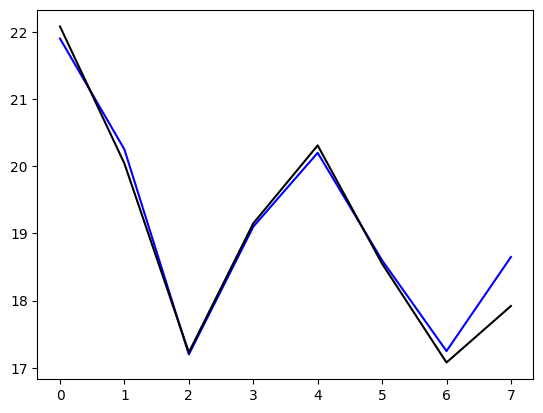

In [27]:
plt.plot(y_test,color ='blue')
plt.plot(y_pred,color = 'black')
plt.show()